In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
plt.rcParams["figure.figsize"] = [14, 6]
sns.set(style="whitegrid", palette="bright", font_scale=1.2)
pd.set_option("display.max_colwidth", None)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

## First Look

In [58]:
df = pd.read_csv("/content/drive/MyDrive/Sentiment Analysis/data/glassdoor_reviews.csv")
df.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy going ethic.,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues","Poor salary which doesn't improve much with progression, no incentive to work harder, high turnover of staff, poor systems"
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in finance,"Very low salary, poor working conditions, very little training provided but high expectations. Micro management are young, inexperienced and superficial girls who are not able to provide guidance and support for their teams."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual training for your job role. No incentive to improve. training. Leaves a bad taste in the mouth when the CEO drives a roll royce and the majority of the workers are payed so lowly"


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838566 entries, 0 to 838565
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   firm                 838566 non-null  object 
 1   date_review          838566 non-null  object 
 2   job_title            838566 non-null  object 
 3   current              838566 non-null  object 
 4   location             541223 non-null  object 
 5   overall_rating       838566 non-null  int64  
 6   work_life_balance    688672 non-null  float64
 7   culture_values       647193 non-null  float64
 8   diversity_inclusion  136066 non-null  float64
 9   career_opp           691065 non-null  float64
 10  comp_benefits        688484 non-null  float64
 11  senior_mgmt          682690 non-null  float64
 12  recommend            838566 non-null  object 
 13  ceo_approv           838566 non-null  object 
 14  outlook              838566 non-null  object 
 15  headline         

<strong>Focusing on Text Data and Overall Rating.</strong>

So, drop unnecessary columns

In [60]:
df = df[["overall_rating","headline","pros","cons","firm","date_review"]]
df.sample(5)

,overall_rating,headline,pros,cons,firm,date_review
711915,2,Customer service complaints,Not many. Lots of overtime as high staff turnover. Good salary and clean environment.,Full time work but kept on 0 hour contracts for over 3 years. Expected to meet all the same targets as the contracted staff with none of the benefits or job security. Very high staff turnover as is a very depressing place to work. Not a place to work if you want to help customers as the focus is on getting them off the phone as soon as possible giving them as little information as possible. This is not a job for a person who enjoys customer service.,Royal-Mail,2017-05-26
735506,2,Not all the glitters is gold.,Salesforce overall is an amazing organization filled with some truly talented people. The product is incredible and the applications are exciting. Their philosophy and culture are world-class. Excellent professional and personal development opportunities.,"Interestingly, what most excited me about Salesforce is what I found most lacking. I found the environment very sexist, male-dominated, negative, and non-inclusive. There is virtually no trust and I feel completely accurate in stating there is no work-life balance. You are collateral damage in the way to achieving a monthly quota. I left a paranoid, shattered professional with emotional scars I would equate to abuse. I'm sure not all experiences are the same as mine. I was unfortunate to land where I did within the organization. I know there are many folks who flourish there.",Salesforce,2016-07-10
535259,4,okay,"friendly, room for promotion depends",too large of a company for some,McDonald-s,2020-08-12
626216,2,Sales,Huge organization with resources abound. Legacy titles that own the marketplace and a footprint that can not be matched,Lack of client focus and care about what the client thinks. Antiquated GTM and view that the world belongs to Oracle and why would anyone think differently,Oracle,2016-07-13
104093,2,Don't Waste Your Time,"Great products and people, excluding most VP/SVP's and above",Senior executives are afraid to take risks. They will do almost anything to protect their position to keep the high compensation flowing to their bank account.,Blue-Yonder,2013-08-15


## Handling the Missing Values and Duplicated

In [61]:
df.isnull().sum()

overall_rating       0
headline          2590
pros                 2
cons                13
firm                 0
date_review          0
dtype: int64

In [62]:
df.duplicated(["headline",	"pros",	"cons"]).sum()

34979

In [63]:
# First drop all duplicated values
# Then, fill the NaN values with ""

In [64]:
df = df.drop_duplicates()
df = df.fillna("")

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 803632 entries, 0 to 838565
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   overall_rating  803632 non-null  int64 
 1   headline        803632 non-null  object
 2   pros            803632 non-null  object
 3   cons            803632 non-null  object
 4   firm            803632 non-null  object
 5   date_review     803632 non-null  object
dtypes: int64(1), object(5)
memory usage: 42.9+ MB


In [66]:
# stratified sampling # Training is takes too long (FULL 1 EPOCH 3hr)
from sklearn.model_selection import train_test_split

df, _ = train_test_split(df, train_size = 0.15, random_state = 42, stratify = df.overall_rating)
df = df.reset_index(drop = True)
df.overall_rating = df.overall_rating -1 # to pytorch

## Look at Some Example

In [67]:
for i in range(5):
    tm = df[df.overall_rating == i].sample(1, random_state = 1)
    print("Firm:", tm.firm.values[0])
    print("Date Review:", tm.date_review.values[0])
    print("Overall Rating:", tm.overall_rating.values[0])
    print("Headline:",  tm.headline.values[0])
    print("Pros:",  tm.pros.values[0])
    print("Cons:",  tm.cons.values[0])
    print("-"*50)

Firm: PwC
Date Review: 2021-01-07
Overall Rating: 0
Headline: Bad culture in Valuations team
Pros: Good starting pay for associates
Cons: Bosses and managers disregard staff feedback 
Manager is very rude and disrespectful to staff using profanities and doesn’t guide associates
--------------------------------------------------
Firm: Tesco
Date Review: 2015-05-18
Overall Rating: 1
Headline: hard to survive
Pros: action in daily life, not monotonous
Cons: no future, downsizing is always on the table, bad decisions
--------------------------------------------------
Firm: Vodafone
Date Review: 2021-03-15
Overall Rating: 2
Headline: average pay
Pros: good working environment, weekly social meetups
Cons: lack of pay, no bonuses
--------------------------------------------------
Firm: Sytner
Date Review: 2020-07-21
Overall Rating: 3
Headline: Great company to work for
Pros: Great management, good working conditions
Cons: None significant to speak of
------------------------------------------

## Cleaning the Sentences

In [68]:
def cleaning_sentences(sen):
    # Remove all the special characters
    sen = re.sub(r"[^\w\s]", " ", sen)
    sen = re.sub(r"\s+", " ", sen, flags=re.I)
    return sen

In [69]:
# i.e
df["pros"].iloc[41]

'Lots of exposure\r\nLots of learning'

In [70]:
print(df["pros"].apply(cleaning_sentences).iloc[41])

Lots of exposure Lots of learning


In [71]:
df["headline"] = df["headline"].apply(cleaning_sentences)
df["pros"] = df["pros"].apply(cleaning_sentences)
df["cons"] = df["cons"].apply(cleaning_sentences)

## Looking at the Data Distribution

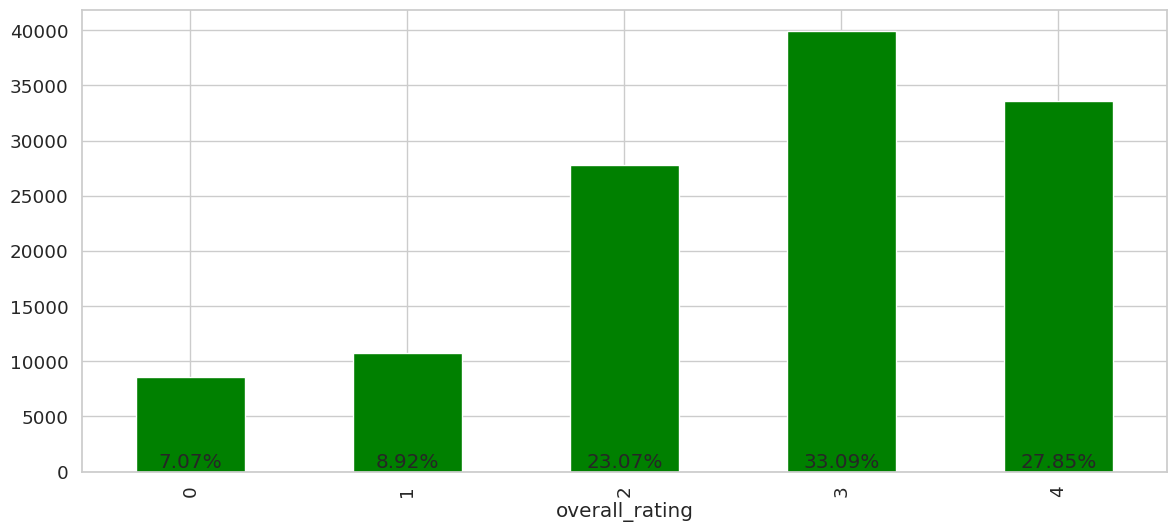

In [72]:
df['overall_rating'].value_counts().sort_index(ascending=True).plot.bar(color="green")
percentages = df['overall_rating'].value_counts(normalize=True).sort_index() * 100
for i, percentage in enumerate(percentages):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

In [73]:
#data imbalance

In [74]:
def sq_overall_rating(x):
    if x == 0 or x== 1:
        return 0
    if x == 2:
        return 1
    else:
        return 2

In [75]:
df.overall_rating = df.overall_rating.apply(sq_overall_rating)

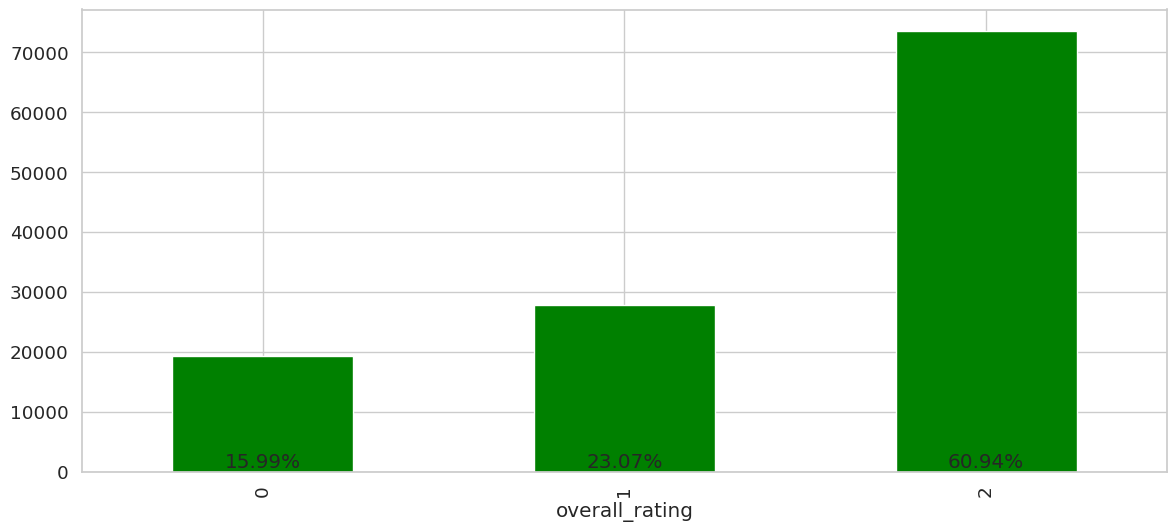

In [76]:
df['overall_rating'].value_counts().sort_index(ascending=True).plot.bar(color="green")
percentages = df['overall_rating'].value_counts(normalize=True).sort_index() * 100
for i, percentage in enumerate(percentages):
    plt.text(i, percentage, f'{percentage:.2f}%', ha='center', va='bottom')

plt.show()

In [77]:
df["head_len"] = df["headline"].apply(lambda x:len(x.split()))
df["pros_len"] = df["pros"].apply(lambda x:len(x.split()))
df["cons_len"] = df["cons"].apply(lambda x:len(x.split()))

In [78]:
df["head_len_cat"] = pd.cut(df["head_len"] , bins = [0,10,20,30,40,50,np.inf], labels= ["0-10","10-20","20-30","30-40","40-50","50+"])
df["pros_len_cat"] = pd.cut(df["pros_len"], bins = [0,10,20,30,40,50,np.inf], labels= ["0-10","10-20","20-30","30-40","40-50","50+"])
df["cons_len_cat"] = pd.cut(df["cons_len"], bins = [0,10,20,30,40,50,np.inf], labels= ["0-10","10-20","20-30","30-40","40-50","50+"])

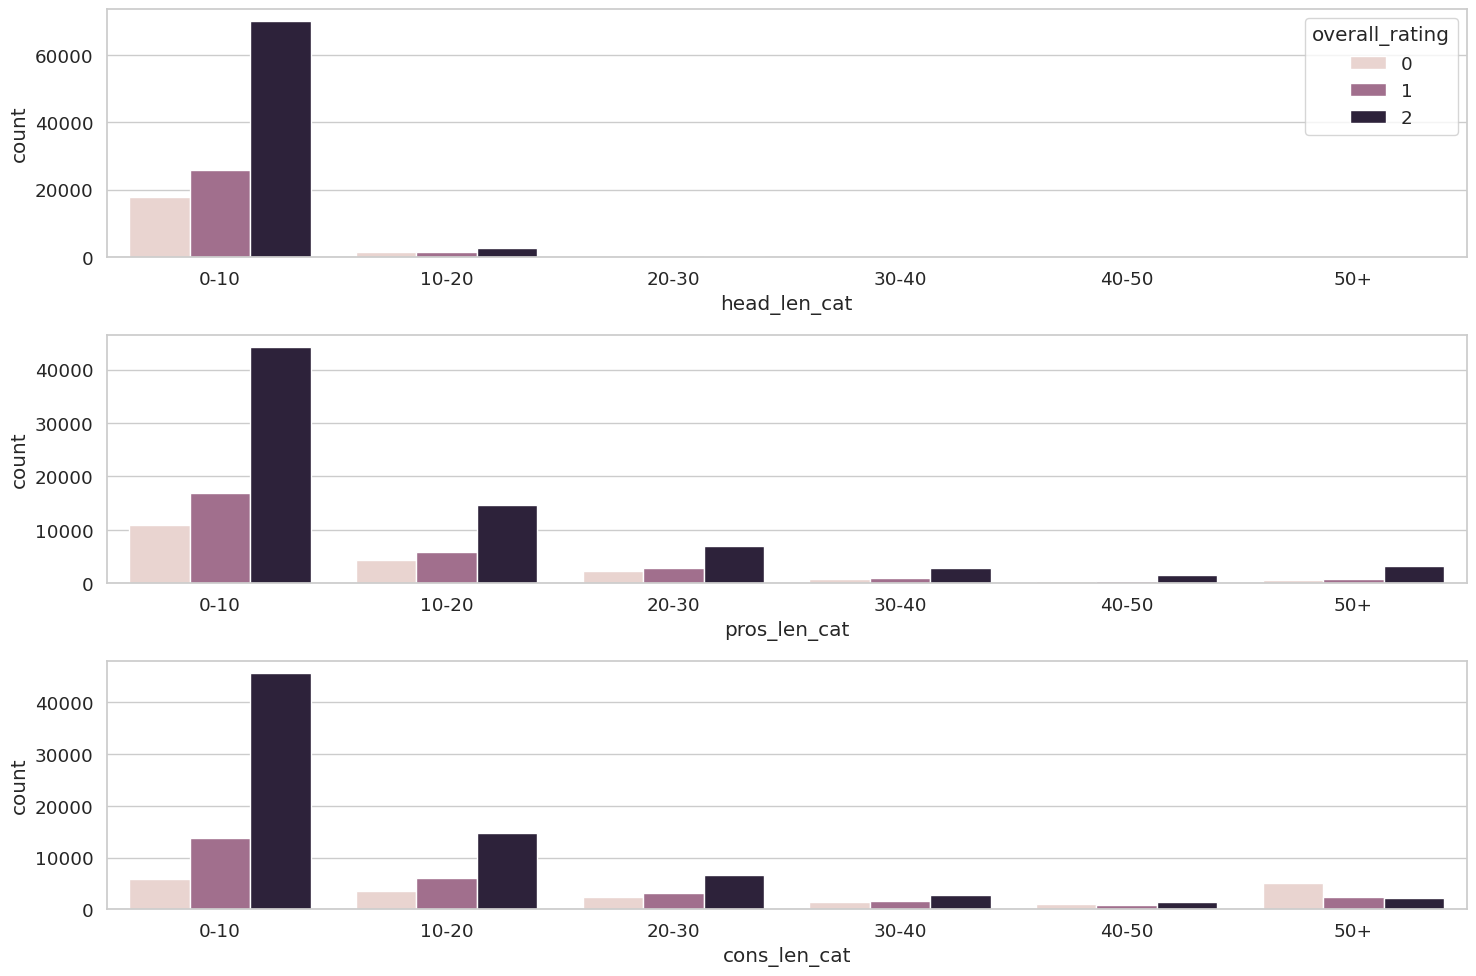

In [79]:
fig, axs = plt.subplots(3,1, figsize=(15, 10))
sns.countplot(df, x ="head_len_cat", hue = "overall_rating", ax = axs[0])
sns.countplot(df, x ="pros_len_cat", hue = "overall_rating", ax = axs[1], legend=None)
sns.countplot(df, x ="cons_len_cat", hue = "overall_rating", ax = axs[2], legend=None)
plt.tight_layout()

In [80]:
# Long senteces and ratings have a correlation

## Dealing with Data Imbalance
https://medium.com/@dinghan1995/how-to-tackle-dataset-class-imbalance-for-nlp-4453af6f6b87

#### 1) Collect More Data:
If feasible, collecting more data for the minority classes can help balance out the dataset.

#### 2) Resampling Techniques:
* Over-sampling:
Increase the number of instances in the minority class by duplicating or generating new instances.
* Under-sampling:
Reduce the number of instances in the majority class by randomly removing instances.
* Synthetic Minority Over-sampling Technique (SMOTE):
Generate synthetic examples for the minority class by interpolating between existing instances.
[SMOTE](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html)

#### 3) Weighted Loss Function: Adjust the loss function to penalize misclassifications of minority class instances more heavily. This can be achieved by assigning higher weights to minority class samples.

I train my model with weighted Loss

## Last Look

In [81]:
# Get rid of all useless columns
df["review"] = df["headline"] + " " + df["pros"] + " " + df["cons"]
df = df[["review", "overall_rating"]]

<Axes: xlabel='review'>

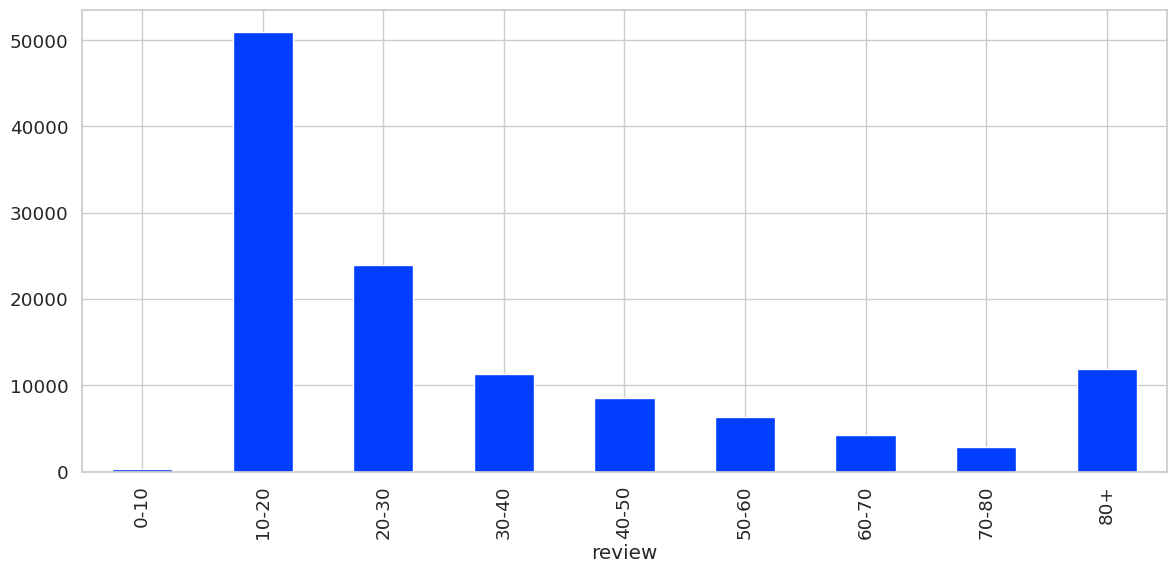

In [82]:
review_len = df.review.apply(lambda x: len(x.split()) )
pd.cut(review_len, bins = [0,10,20,30,40,50,60,70,80,np.inf], labels= ["0-10","10-20","20-30","30-40","40-50","50-60","60-70","70-80","80+"]).value_counts().sort_index().plot.bar()

In [83]:
df = df.reset_index(drop = True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120544 entries, 0 to 120543
Data columns (total 2 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   review          120544 non-null  object
 1   overall_rating  120544 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [ ]:
df.to_csv("cleaning_glassdoor.csv", index = False)